In [31]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import pandas as pd
from datetime import datetime
from sklearn import preprocessing
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
import joblib

In [ ]:
import numpy as np

# Function to generate time series data
def generate_time_series(sample_size, n_steps):
    # Generate random values for frequencies and offsets for each sample
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, sample_size, 1)

    # Generate a time vector from 0 to 1 with n_steps values
    time = np.linspace(0, 1, n_steps)

    # Create the time series data with two sine wave components and added noise
    # Component 1: A sine wave with frequency modulation (wave1)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))

    # Component 2: A sine wave with frequency modulation (wave2)
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20))

    # Add noise to the series using random values between -0.5 and 0.5
    series += 0.1 * (np.random.rand(sample_size, n_steps) - 0.5)

    # Expand the dimensions of the series to include a new axis
    # This is done to match the expected shape for model training
    return series[..., np.newaxis].astype(np.float32)


In [ ]:
# Define the number of samples and the number of time steps per sample
sample_size = 10000
n_steps = 51

# Generate time series data using the previously defined function
# The 'data' variable will store the generated time series
data = generate_time_series(sample_size, n_steps)

In [4]:
# Calculate sizes for training, validation, and testing sets
train_size = int(0.7 * sample_size)  # 70% of the total samples
val_size = int(0.2 * sample_size)    # 20% of the total samples
test_size = sample_size - train_size - val_size  # Remaining for testing

# Split the generated data into training, validation, and testing sets
train_data = data[:train_size]                      # Training data
val_data = data[train_size:train_size+val_size]     # Validation data
test_data = data[train_size+val_size:]              # Testing data

# Separate input features (input time steps) and labels (last time step) for training data
train_input, train_labels = train_data[:, :-1], train_data[:, -1]

# Separate input features and labels for validation data
val_input, val_labels = val_data[:, :-1], val_data[:, -1]

# Separate input features and labels for testing data
test_input, test_labels = test_data[:, :-1], test_data[:, -1]


In [5]:
# Create a Sequential model for the Fully Connected Neural Network (FCNN)
fc_model = Sequential([
    Dense(64, activation='relu', input_shape=(n_steps-1,)),  # Input layer with ReLU activation
    Dense(32, activation='relu'),                           # Hidden layer with ReLU activation
    Dense(1)                                                # Output layer
])

# Compile the FCNN model with optimizer and loss function
fc_model.compile(optimizer='adam', loss='mse')

# Train the FCNN model using training data and validate with validation data
fc_model.fit(train_input, train_labels, validation_data=(val_input, val_labels), epochs=10)

# Evaluate the FCNN model on the test data and store the test loss
fc_loss = fc_model.evaluate(test_input, test_labels)


Epoch 1/10
219/219 [==============================] - 2s 3ms/step - loss: 0.0220 - val_loss: 0.0065
Epoch 2/10
219/219 [==============================] - 1s 2ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 3/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0042 - val_loss: 0.0045
Epoch 4/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 5/10
219/219 [==============================] - 1s 3ms/step - loss: 0.0034 - val_loss: 0.0038
Epoch 6/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0031 - val_loss: 0.0034
Epoch 7/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0032
Epoch 8/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0029 - val_loss: 0.0036
Epoch 9/10
219/219 [==============================] - 1s 2ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 10/10
32/32 [==============================] - 0s 3ms/step - loss: 0.0034


In [6]:
# Create a Sequential model for the Simple RNN with 1 Hidden Layer
rnn1_model = Sequential([
    SimpleRNN(32, activation='relu', return_sequences=True, input_shape=(n_steps-1, 1)),  # Simple RNN layer with ReLU activation
    Dense(1)                                                                             # Output layer
])

# Compile the RNN model with optimizer and loss function
rnn1_model.compile(optimizer='adam', loss='mse')

# Train the RNN model using training data and validate with validation data
rnn1_model.fit(train_input, train_labels, validation_data=(val_input, val_labels), epochs=10)

# Evaluate the RNN model on the test data and store the test loss
rnn1_loss = rnn1_model.evaluate(test_input, test_labels)


Epoch 1/10
219/219 [==============================] - 4s 13ms/step - loss: 0.1442 - val_loss: 0.1443
Epoch 2/10
219/219 [==============================] - 3s 13ms/step - loss: 0.1431 - val_loss: 0.1440
Epoch 3/10
219/219 [==============================] - 3s 13ms/step - loss: 0.1430 - val_loss: 0.1438
Epoch 4/10
219/219 [==============================] - 4s 20ms/step - loss: 0.1428 - val_loss: 0.1436
Epoch 5/10
219/219 [==============================] - 3s 14ms/step - loss: 0.1425 - val_loss: 0.1433
Epoch 6/10
219/219 [==============================] - 3s 12ms/step - loss: 0.1425 - val_loss: 0.1432
Epoch 7/10
219/219 [==============================] - 3s 12ms/step - loss: 0.1425 - val_loss: 0.1443
Epoch 8/10
219/219 [==============================] - 3s 12ms/step - loss: 0.1418 - val_loss: 0.1414
Epoch 9/10
219/219 [==============================] - 4s 20ms/step - loss: 0.1421 - val_loss: 0.1438
Epoch 10/10
32/32 [==============================] - 0s 6ms/step - loss: 0.1482


In [ ]:
# Create a Sequential model for the Simple RNN with 2 Hidden Layers
rnn2_model = Sequential([
    SimpleRNN(32, activation='relu', return_sequences=True, input_shape=(n_steps-1, 1)),  # First Simple RNN layer with ReLU activation
    SimpleRNN(16, activation='relu'),                                                    # Second Simple RNN layer with ReLU activation
    Dense(1)                                                                             # Output layer
])

# Compile the RNN model with optimizer and loss function
rnn2_model.compile(optimizer='adam', loss='mse')

# Train the RNN model using training data and validate with validation data
rnn2_model.fit(train_input, train_labels, validation_data=(val_input, val_labels), epochs=10)

# Evaluate the RNN model on the test data and store the test loss
rnn2_loss = rnn2_model.evaluate(test_input, test_labels)


Epoch 1/10
219/219 [==============================] - 7s 23ms/step - loss: 0.0167 - val_loss: 0.0054
Epoch 2/10
219/219 [==============================] - 6s 27ms/step - loss: 0.0046 - val_loss: 0.0050
Epoch 3/10
219/219 [==============================] - 5s 22ms/step - loss: 0.0042 - val_loss: 0.0037
Epoch 4/10
219/219 [==============================] - 5s 23ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 5/10
219/219 [==============================] - 6s 26ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 6/10
219/219 [==============================] - 5s 21ms/step - loss: 0.0037 - val_loss: 0.0035
Epoch 7/10
219/219 [==============================] - 6s 27ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 8/10
219/219 [==============================] - 5s 23ms/step - loss: 0.0035 - val_loss: 0.0038
Epoch 9/10
219/219 [==============================] - 5s 23ms/step - loss: 0.0035 - val_loss: 0.0038
Epoch 10/10
32/32 [==============================] - 0s 9ms/step - loss: 0.0031


In [ ]:
# Create a Sequential model for the Simple RNN with 3 Hidden Layers
rnn3_model = Sequential([
    SimpleRNN(32, activation='relu', return_sequences=True, input_shape=(n_steps-1, 1)),  # First Simple RNN layer with ReLU activation
    SimpleRNN(16, activation='relu', return_sequences=True),                            # Second Simple RNN layer with ReLU activation
    SimpleRNN(8, activation='relu'),                                                    # Third Simple RNN layer with ReLU activation
    Dense(1)                                                                             # Output layer
])

# Compile the RNN model with optimizer and loss function
rnn3_model.compile(optimizer='adam', loss='mse')

# Train the RNN model using training data and validate with validation data
rnn3_model.fit(train_input, train_labels, validation_data=(val_input, val_labels), epochs=10)

# Evaluate the RNN model on the test data and store the test loss
rnn3_loss = rnn3_model.evaluate(test_input, test_labels)


Epoch 1/10
219/219 [==============================] - 11s 37ms/step - loss: 0.0340 - val_loss: 0.0084
Epoch 2/10
219/219 [==============================] - 8s 37ms/step - loss: 0.0061 - val_loss: 0.0051
Epoch 3/10
219/219 [==============================] - 7s 31ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 4/10
219/219 [==============================] - 8s 37ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 5/10
219/219 [==============================] - 8s 36ms/step - loss: 0.0041 - val_loss: 0.0044
Epoch 6/10
219/219 [==============================] - 7s 32ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 7/10
219/219 [==============================] - 8s 37ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 8/10
219/219 [==============================] - 7s 31ms/step - loss: 0.0039 - val_loss: 0.0042
Epoch 9/10
219/219 [==============================] - 8s 37ms/step - loss: 0.0038 - val_loss: 0.0038
Epoch 10/10
32/32 [==============================] - 0s 8ms/step - loss: 0.0036


In [ ]:
# Create a Sequential model for the Simple RNN with 4 Hidden Layers
rnn4_model = Sequential([
    SimpleRNN(32, activation='relu', return_sequences=True, input_shape=(n_steps-1, 1)),  # First Simple RNN layer with ReLU activation
    SimpleRNN(16, activation='relu', return_sequences=True),                            # Second Simple RNN layer with ReLU activation
    SimpleRNN(8, activation='relu', return_sequences=True),                             # Third Simple RNN layer with ReLU activation
    SimpleRNN(4, activation='relu'),                                                    # Fourth Simple RNN layer with ReLU activation
    Dense(1)                                                                             # Output layer
])

# Compile the RNN model with optimizer and loss function
rnn4_model.compile(optimizer='adam', loss='mse')

# Train the RNN model using training data and validate with validation data
rnn4_model.fit(train_input, train_labels, validation_data=(val_input, val_labels), epochs=10)

# Evaluate the RNN model on the test data and store the test loss
rnn4_loss = rnn4_model.evaluate(test_input, test_labels)


Epoch 1/10
219/219 [==============================] - 16s 54ms/step - loss: 0.0186 - val_loss: 0.0059
Epoch 2/10
219/219 [==============================] - 10s 47ms/step - loss: 0.0056 - val_loss: 0.0083
Epoch 3/10
219/219 [==============================] - 10s 47ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 4/10
219/219 [==============================] - 11s 50ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 5/10
219/219 [==============================] - 9s 42ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 6/10
219/219 [==============================] - 10s 45ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 7/10
219/219 [==============================] - 10s 47ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 8/10
219/219 [==============================] - 10s 46ms/step - loss: 0.0036 - val_loss: 0.0044
Epoch 9/10
219/219 [==============================] - 9s 43ms/step - loss: 0.0035 - val_loss: 0.0035
Epoch 10/10
32/32 [==============================] - 0s 11ms/step - loss: 0.0032


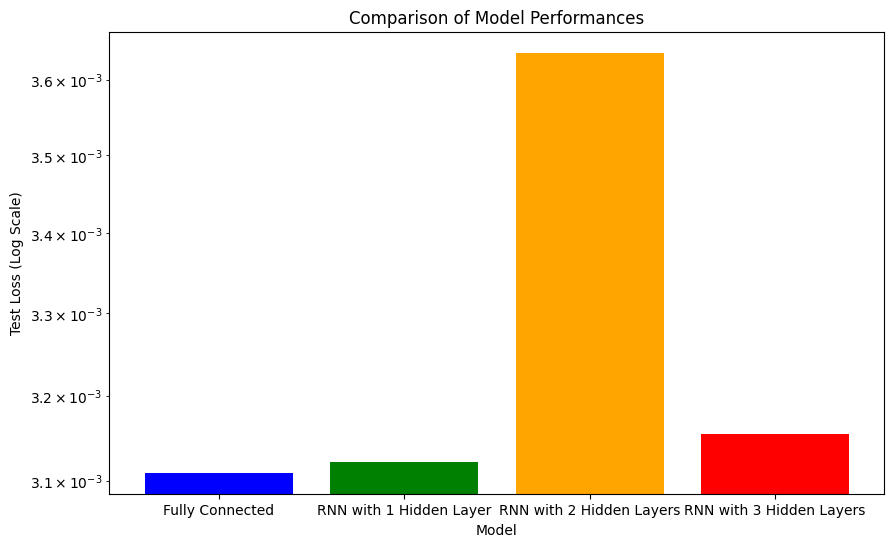

In [ ]:
import matplotlib.pyplot as plt

# Model names and their corresponding losses
model_names = ['Fully Connected', 'RNN with 1 Hidden Layer', 'RNN with 2 Hidden Layers', 'RNN with 3 Hidden Layers']
model_losses = [fc_loss, rnn2_loss, rnn3_loss, rnn4_loss]

# Define colors for each model
colors = ['blue', 'green', 'orange', 'red']

# Visualize the results with better scale and colors
plt.figure(figsize=(10, 6))
plt.bar(model_names, model_losses, color=colors)
plt.yscale('log')  # Use logarithmic scale for better visualization of varying losses
plt.xlabel('Model')
plt.ylabel('Test Loss (Log Scale)')
plt.title('Comparison of Model Performances')
plt.show()


In [ ]:
/content/drive/MyDrive/VthSem/DeepLearningLab/Week5/data/Google_Stock_Price_Test.csv

NameError: ignored

In [ ]:
## Summary of Model Performance Comparison

- The chart compares the test loss of three different models: a fully connected model, an RNN model with 1 hidden layer, and an RNN model with 2 hidden layers. The test loss is measured on a log scale.

- The fully connected model has the lowest test loss among the three models, which suggests that it exhibits the best generalization performance on unseen data.

- The RNN models have higher test loss compared to the fully connected model. This implies that the RNN models might be overfitting the training data or underfitting the test data.

- Interestingly, the RNN model with 2 hidden layers shows the highest test loss among the three models. This finding indicates that adding more hidden layers to the RNN architecture doesn't necessarily lead to improved performance.

In conclusion, this comparison highlights the strengths of the fully connected model in terms of generalization, while also pointing out potential challenges with the RNN architectures and the impact of their depth.


## Summary of Model Performance Comparison

- The chart compares the test loss of three different models: a fully connected model, an RNN model with 1 hidden layer, and an RNN model with 2 hidden layers. The test loss is measured on a log scale.

- The fully connected model has the lowest test loss among the three models, which suggests that it exhibits the best generalization performance on unseen data.

- The RNN models have higher test loss compared to the fully connected model. This implies that the RNN models might be overfitting the training data or underfitting the test data.

- Interestingly, the RNN model with 2 hidden layers shows the highest test loss among the three models. This finding indicates that adding more hidden layers to the RNN architecture doesn't necessarily lead to improved performance.

In conclusion, this comparison highlights the strengths of the fully connected model in terms of generalization, while also pointing out potential challenges with the RNN architectures and the impact of their depth.


In [1]:
import pandas as pd

# Read CSV file with specified delimiter and encoding
csv_file_path = '/content/drive/MyDrive/VthSem/DeepLearningLab/Week5/data/GOOG.csv'
df = pd.read_csv(csv_file_path)


In [2]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [3]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [5]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [7]:
# Removing %h-%m-%s From Date Column
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%d-%m-%Y')
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,14-06-2016,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,15-06-2016,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,16-06-2016,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,17-06-2016,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,20-06-2016,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,07-06-2021,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,08-06-2021,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,09-06-2021,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,10-06-2021,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [9]:
# Converting Object To Datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

In [10]:
# Remove 'symbol' Column From Dataset
df.drop(columns= 'symbol', axis=1,inplace=True )

In [8]:
# Checking The Type Of Data Column(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


<ipython-input-15-f7edff9b37b0>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df, x=df[column], color='#75f8f2')
<ipython-input-15-f7edff9b37b0>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df, x=df[column], color='#75f8f2')
<ipython-input-15-f7edff9b37b0>:10: UserWarning: 

`distplot` 

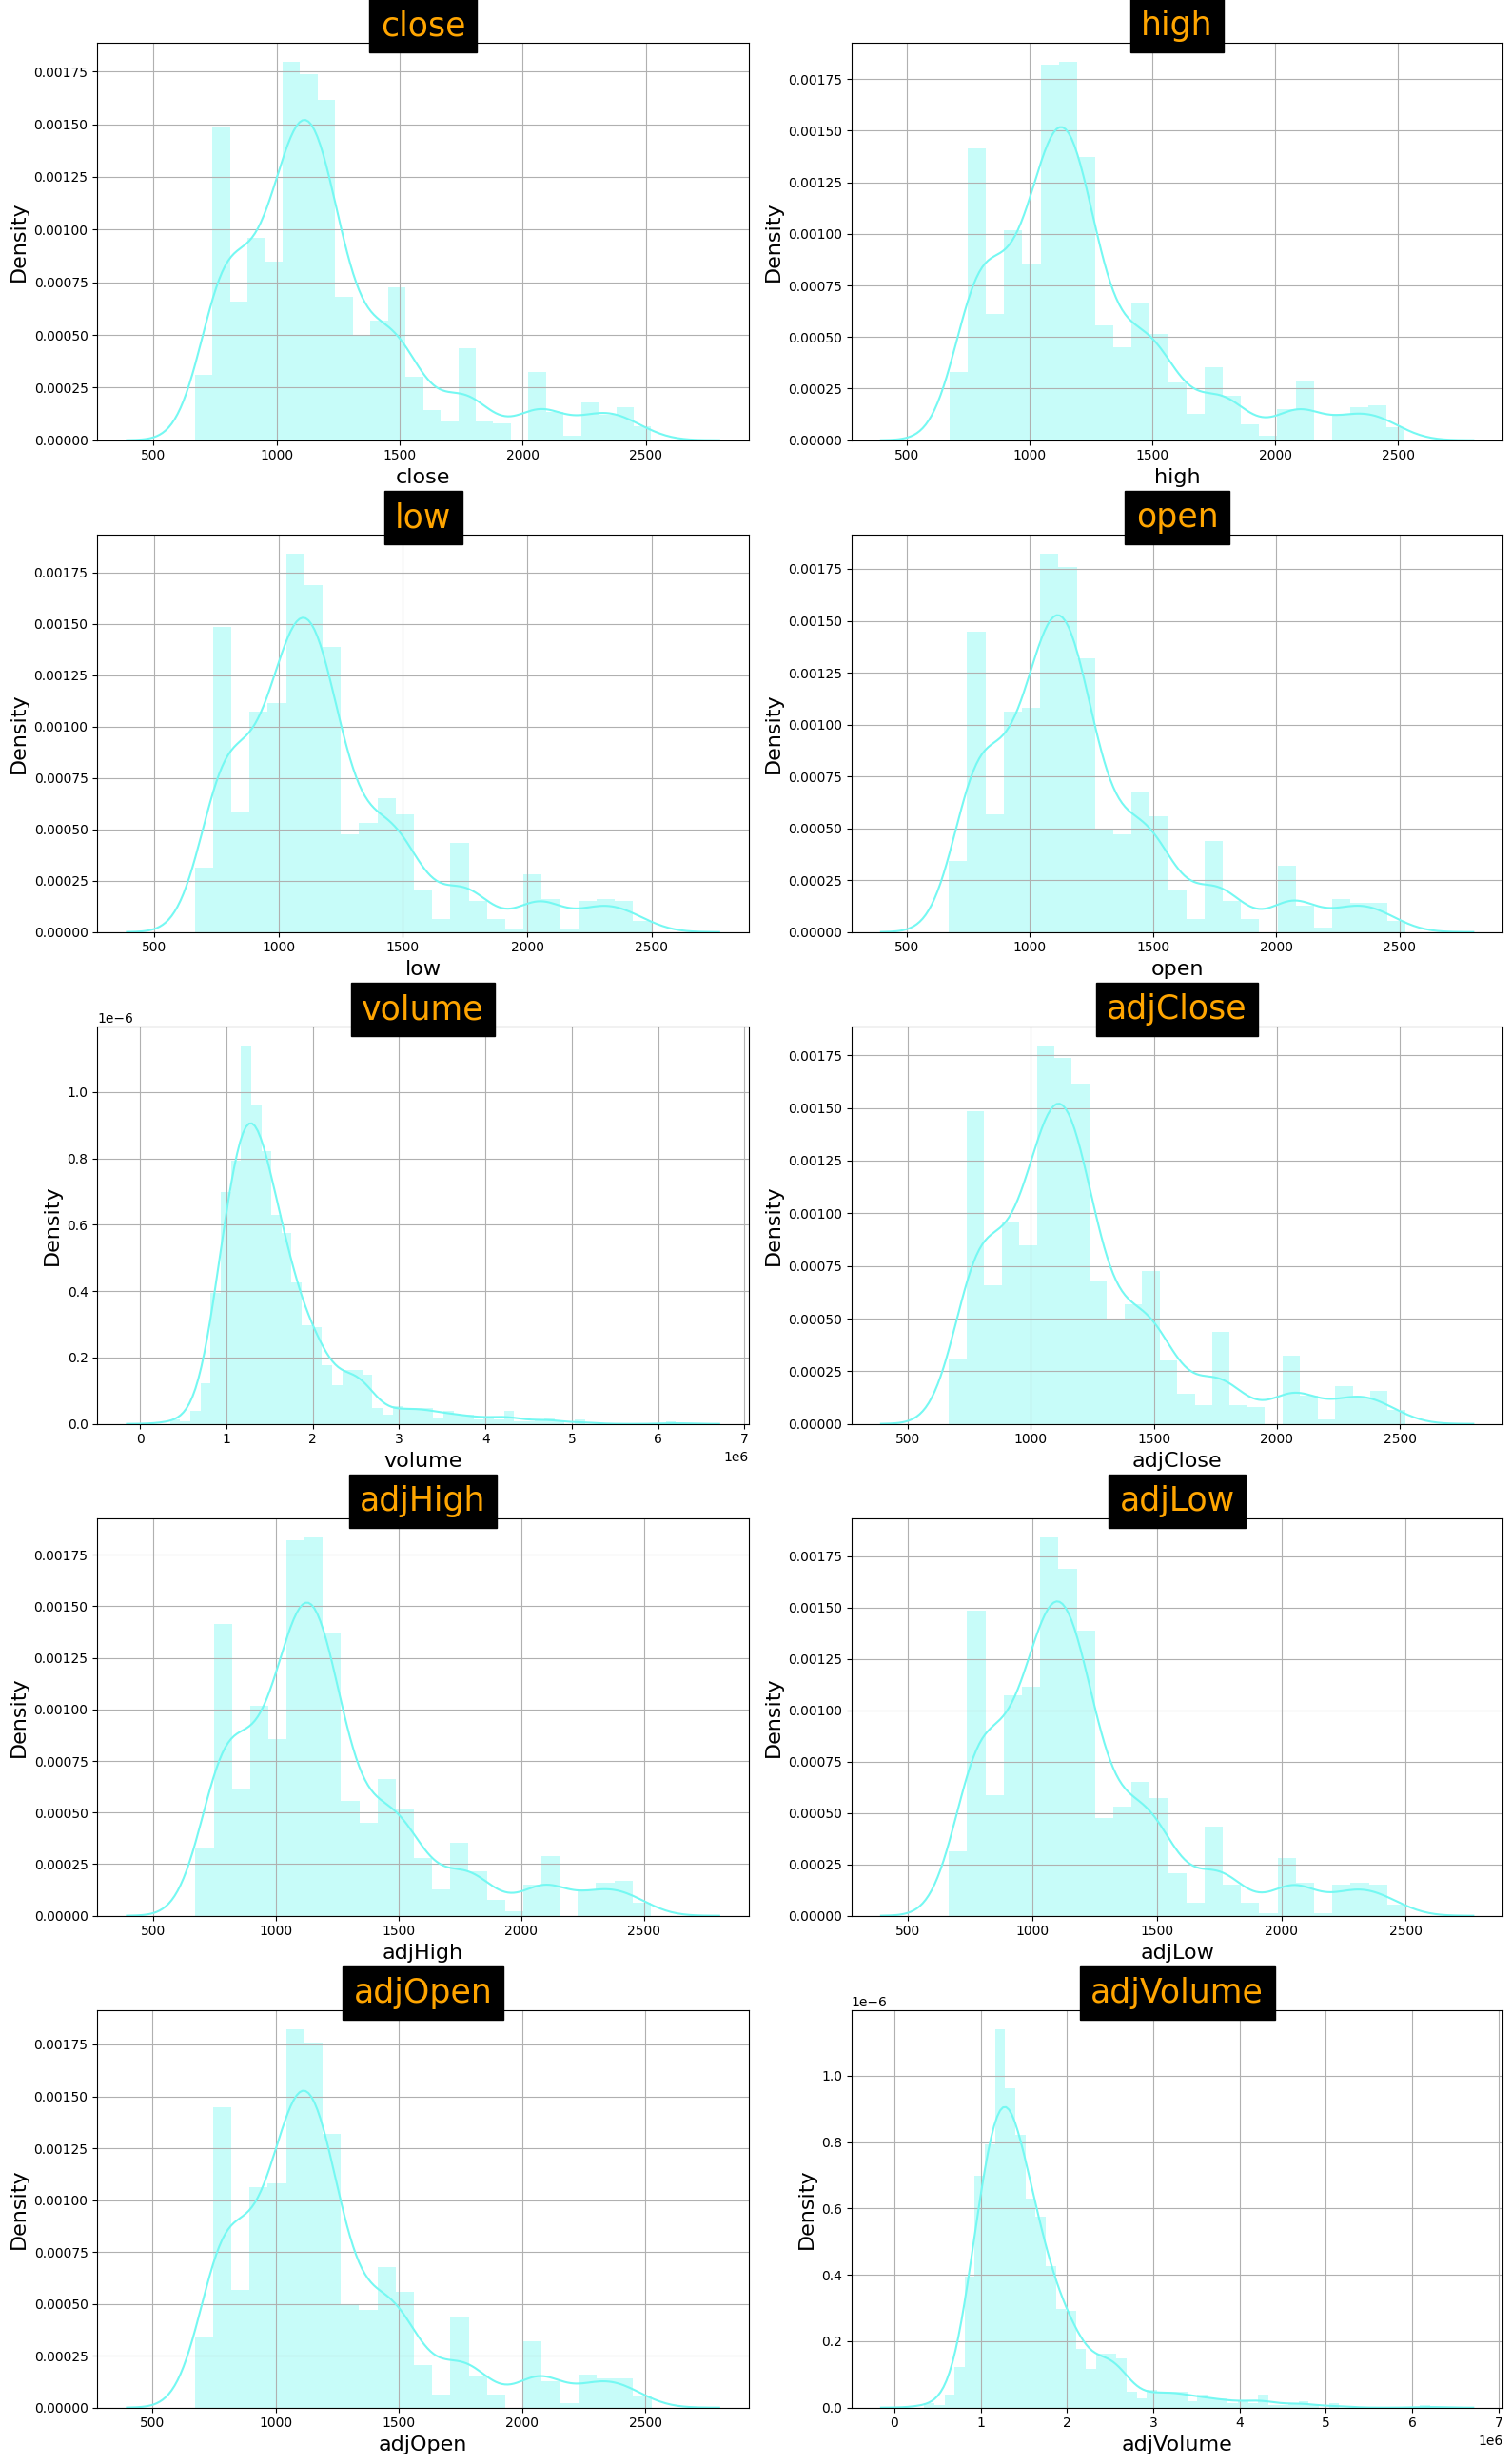

In [15]:
# Checking distribution
import seaborn as sns
import matplotlib.pyplot as plt

features = ['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume']
sns.set_palette("PiYG")
plt.figure(figsize=(16,26))
for idx, column in enumerate(features):
    plt.subplot(5, 2, idx + 1)
    sns.distplot(df, x=df[column], color='#75f8f2')
    plt.title(column, backgroundcolor='black', color='orange', fontsize=25)
    plt.xticks()
    plt.xlabel(column, fontsize=16)
    plt.ylabel('Density', fontsize=16)
    plt.grid()

plt.tight_layout()
plt.show()

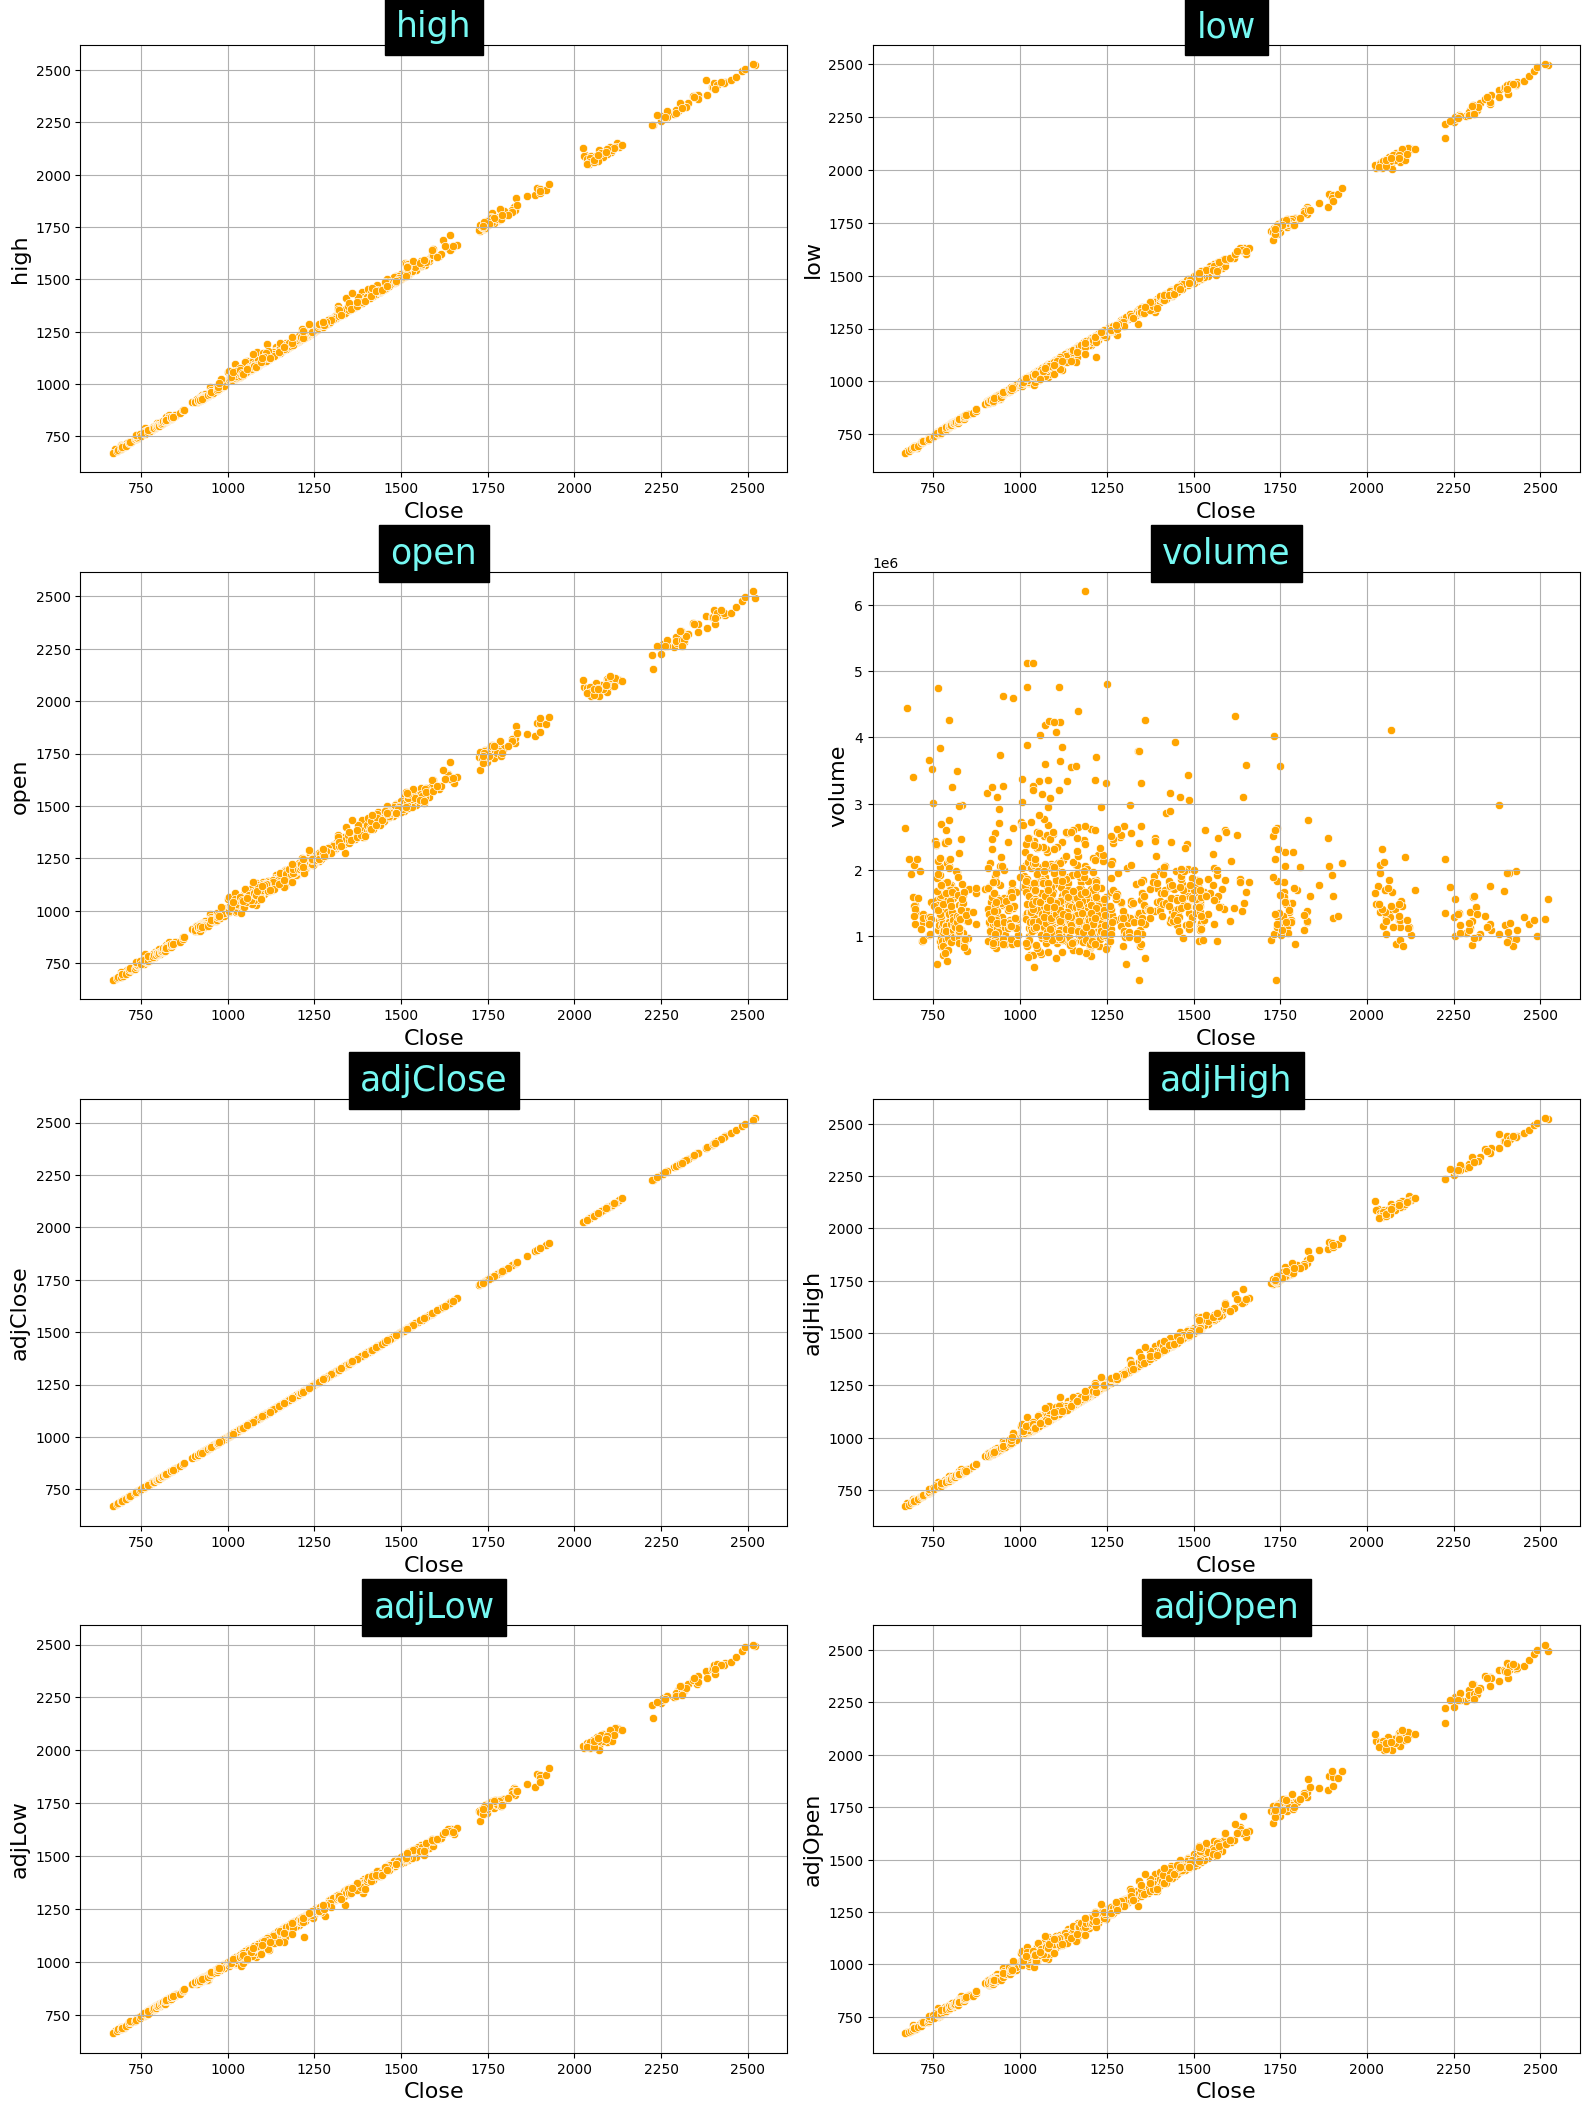

In [16]:
# checking The Behavior Of Features In Relation To 'close'
features = ['high', 'low', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen']
sns.set_palette("PiYG")
plt.figure(figsize=(16,26))
for idx, column in enumerate(features):
    plt.subplot(5, 2,  idx + 1)
    sns.scatterplot(x =df['close'], y=df[column] , data = df, color='orange')
    plt.title(column, backgroundcolor='black', color='#75f8f2', fontsize=25)
    plt.xlabel('Close', fontsize=16)
    plt.ylabel(column, fontsize=16)
    plt.grid()
plt.tight_layout()
plt.show()

<ipython-input-18-0455c7c7f8c0>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,5,i+1)
<ipython-input-18-0455c7c7f8c0>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,5,i+1)
<ipython-input-18-0455c7c7f8c0>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,5,i+1)
<ipython-input-18-0455c7c7f8c0>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,5,i+1)
<ipython-input-18-0455c7c7f8c0>:5: MatplotlibDeprecationWarning: Auto-removal of

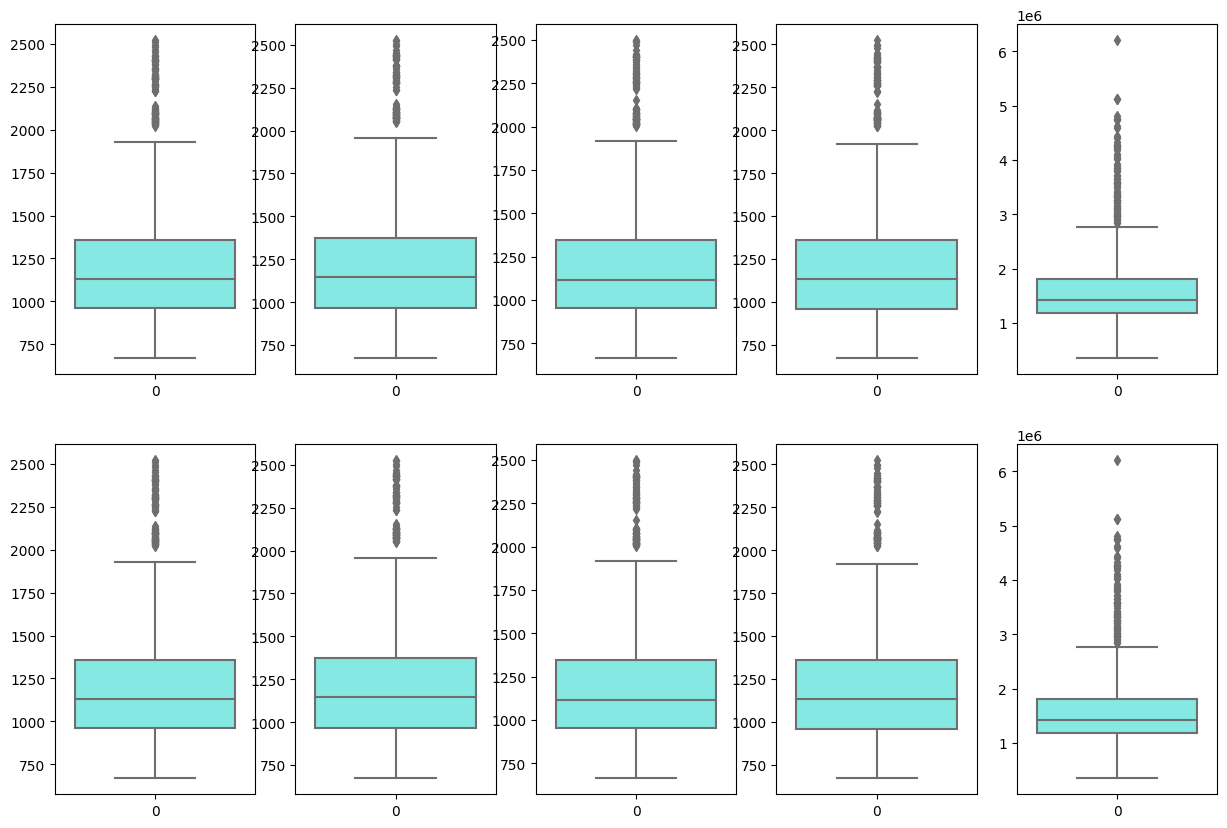

In [18]:
# Subplot
features = ['close', 'high', 'low', 'open', 'volume', 'adjClose', 'adjHigh', 'adjLow', 'adjOpen', 'adjVolume']
fig  = plt.subplots(nrows = 3, ncols = 3,figsize = (15,10))
for i in range(len(features)) :
    plt.subplot(2,5,i+1)
    ax = sns.boxplot(df[features[i]], color="#75f8f2")

plt.show()

In [19]:
# Creating new dataset For plot
df1 = df.drop(['date', 'divCash', 'splitFactor'], axis=1)
df1

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume
0,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065
1,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517
2,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471
3,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357
4,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538
...,...,...,...,...,...,...,...,...,...,...
1253,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453
1254,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253
1255,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337
1256,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733


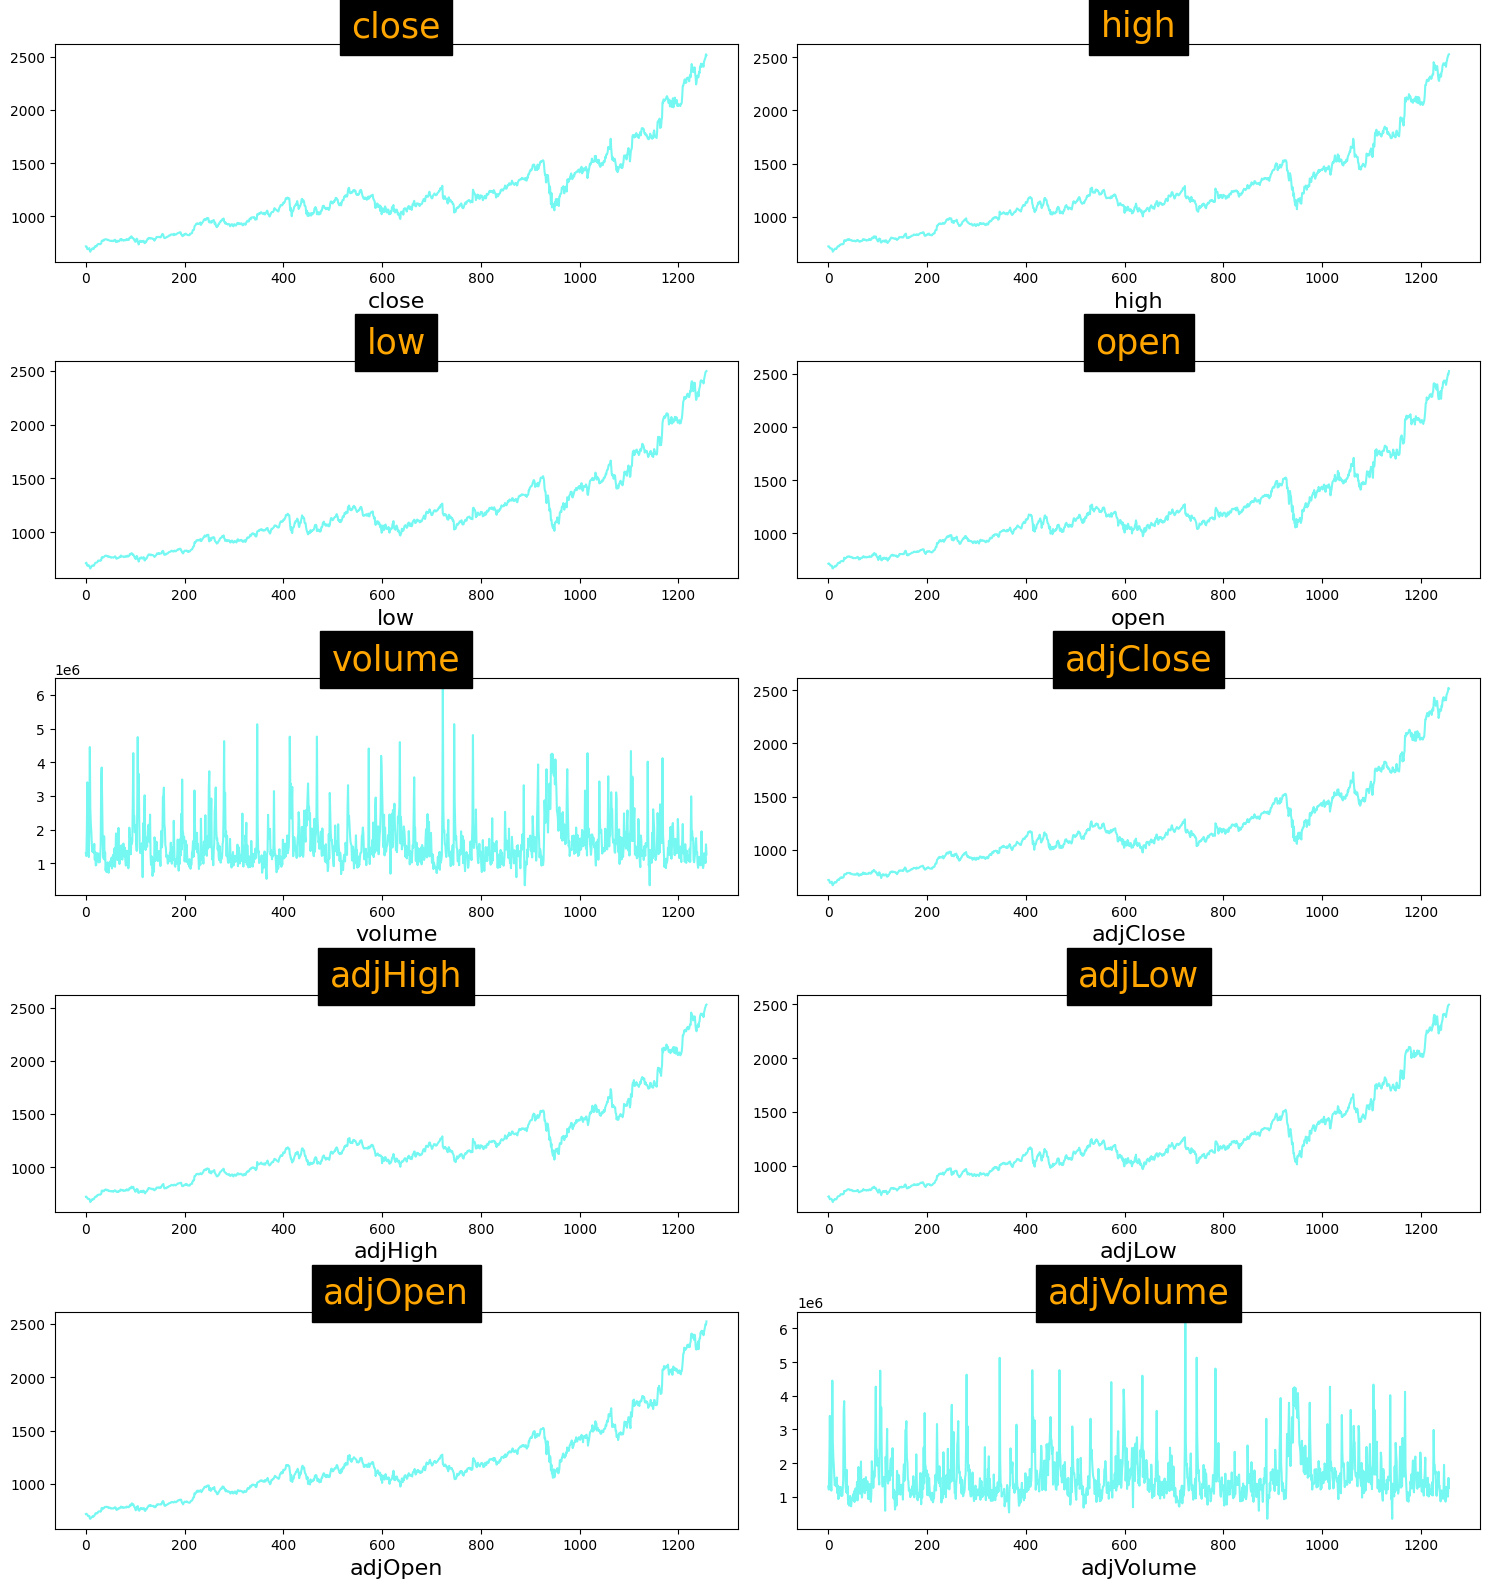

In [20]:
plt.figure(figsize = (15,25))
for idx, i in enumerate(df1):
    plt.subplot(8, 2, idx + 1)
    plt.plot(df1.index.values,df1[i], color='#75f8f2')
    plt.title(i,backgroundcolor='black',color='orange',fontsize=25)
    plt.xlabel(i, size = 16)
plt.tight_layout()
plt.show()

In [21]:
# New Style
plt.style.use("fivethirtyeight")

In [22]:
# copy from df
df1= df.copy()

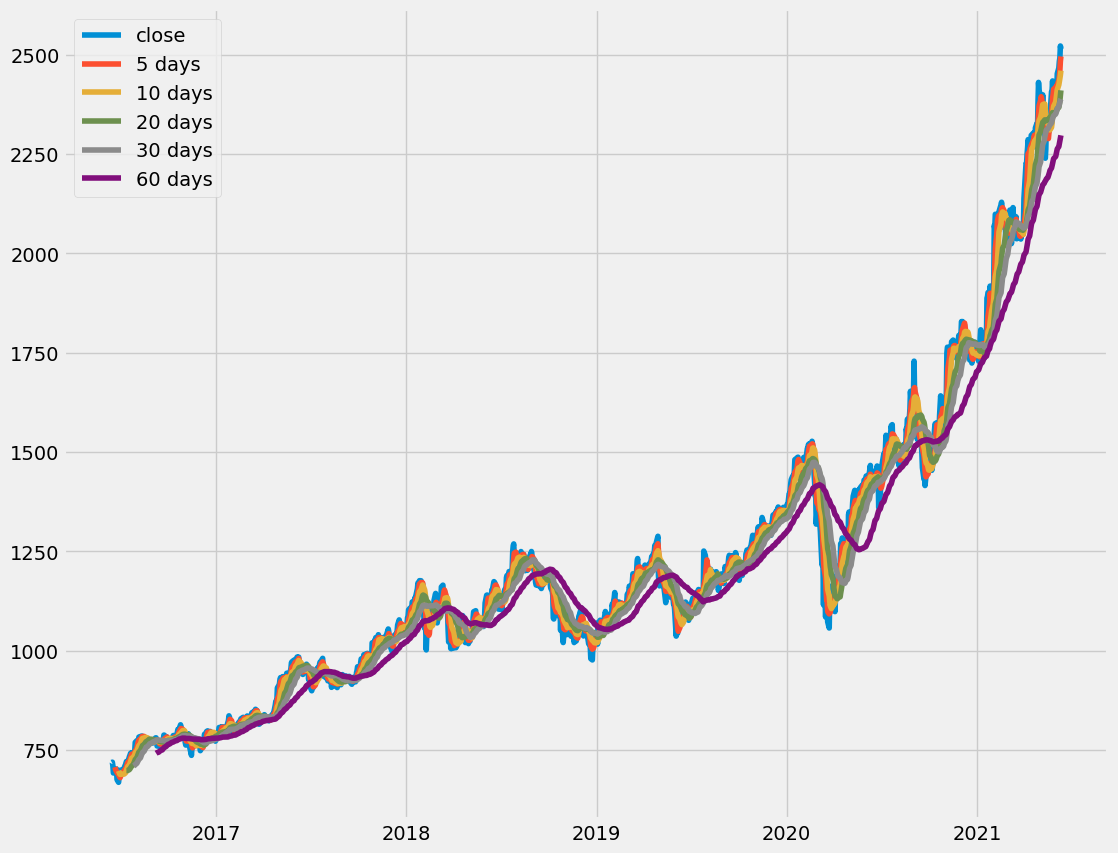

In [23]:
# Checking and choosing the best time step
ma_days = [5, 10, 20, 30, 60]

for MA in ma_days:
    column_name = f"MA in {MA} days"
    df1[column_name] = df1['close'].rolling(MA).mean()

plt.figure(figsize=(12,10))

plt.plot(df1['date'],df1['close'],label='close')
plt.plot(df1['date'],df1['MA in 5 days'],label= '5 days')
plt.plot(df1['date'],df1['MA in 10 days'],label= '10 days')
plt.plot(df1['date'],df1['MA in 20 days'],label= '20 days')
plt.plot(df1['date'],df1['MA in 30 days'],label= '30 days')
plt.plot(df1['date'],df1['MA in 60 days'],label= '60 days')
plt.legend()
plt.show()

In [24]:
# Cheking DataFram
df1

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor,MA in 5 days,MA in 10 days,MA in 20 days,MA in 30 days,MA in 60 days
0,2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0,NaN,NaN,NaN,NaN,NaN
1,2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0,NaN,NaN,NaN,NaN,NaN
2,2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0,NaN,NaN,NaN,NaN,NaN
3,2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0,NaN,NaN,NaN,NaN,NaN
4,2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0,706.596,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0,2434.710,2423.689,2366.9630,2369.308000,2268.337000
1254,2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0,2445.318,2431.307,2374.0225,2374.511667,2275.352500
1255,2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0,2459.342,2439.540,2383.1545,2380.654333,2282.434333
1256,2021-06-10,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0,2482.740,2448.347,2397.2805,2385.377333,2289.585667


In [25]:
# Copy from df1
df2= df1.copy()

In [33]:
# Normalaze Data For Create Train and Test with new dataframe with only the 'Close' column
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
# fit scaler on only one column('close')
scaled = scaler.fit_transform(df2.filter(['close']))
# now have a scaled dataframe with 'colose column'
df3=pd.DataFrame(scaled, columns=['close'])

In [34]:
# Get describe horizontally with '.T'
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
close,1258.0,0.295713,0.206834,0.0,0.157846,0.250467,0.373561,1.0


In [35]:
# Finding a Length of %80 from the number of rows to Create a train Dataset (using array)
new_dataset_length = int(np.ceil( len(df2.filter(['close']).values) * .8 ))
print('Length of %80 of Dataset is ',new_dataset_length, ' Therefore, the test data length is ',len(df.close) - new_dataset_length)

Length of %80 of Dataset is  1007  Therefore, the test data length is  251


In [36]:
# Create the training data set with 20 time steps
# finding the best time step from MA that 20 was the most optimal

train = scaled[0:int(new_dataset_length), :]

time_step = 20

X_train = []
y_train = []

for i in range(time_step, len(train)):
    X_train.append(train[i-time_step:i, 0])
    y_train.append(train[i, 0])
    if i<= (time_step+1):
        print(X_train)
        print(y_train)
        print()

[array([0.02698372, 0.02733443, 0.02271575, 0.01265823, 0.01373196,
       0.0149352 , 0.01575534, 0.01813483, 0.00375538, 0.        ,
       0.00635609, 0.00855213, 0.01286326, 0.01669958, 0.01415283,
       0.0159226 , 0.01462225, 0.0201636 , 0.02526789, 0.02826249])]
[0.026287675224189844]

[array([0.02698372, 0.02733443, 0.02271575, 0.01265823, 0.01373196,
       0.0149352 , 0.01575534, 0.01813483, 0.00375538, 0.        ,
       0.00635609, 0.00855213, 0.01286326, 0.01669958, 0.01415283,
       0.0159226 , 0.01462225, 0.0201636 , 0.02526789, 0.02826249]), array([0.02733443, 0.02271575, 0.01265823, 0.01373196, 0.0149352 ,
       0.01575534, 0.01813483, 0.00375538, 0.        , 0.00635609,
       0.00855213, 0.01286326, 0.01669958, 0.01415283, 0.0159226 ,
       0.01462225, 0.0201636 , 0.02526789, 0.02826249, 0.02628768])]
[0.026287675224189844, 0.02842975384980634]



In [37]:
# Converting the X_train and y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

In [38]:
# Reshape the X_train
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [39]:
# Creating the test dataset
test = scaled[new_dataset_length-time_step:, :]

In [40]:
# Creating DataSets of y_test
y_test =  np.array(scaler.inverse_transform(df3))[new_dataset_length:, :]

In [41]:
# Creating dataset of X_test
X_test = []
for i in range(time_step, len(test)):
    X_test.append(test[i-time_step:i, 0])

In [42]:
# Converting dataset to a numpy array
X_test = np.array(X_test)
y_test = np.array(y_test)

In [43]:
# Reshaping the data for learning in RNN model
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1 ))

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Define the model
model = Sequential([
    SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    SimpleRNN(32, activation='relu', return_sequences=True),
    Dropout(0.2),
    SimpleRNN(16, activation='relu', return_sequences=True),
    Dropout(0.2),
    SimpleRNN(8, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.1)


Epoch 1/50
14/14 [==============================] - 12s 124ms/step - loss: 0.0450 - val_loss: 0.0862
Epoch 2/50
14/14 [==============================] - 2s 133ms/step - loss: 0.0243 - val_loss: 0.0253
Epoch 3/50
14/14 [==============================] - 3s 188ms/step - loss: 0.0153 - val_loss: 0.0297
Epoch 4/50
14/14 [==============================] - 2s 105ms/step - loss: 0.0124 - val_loss: 0.0168
Epoch 5/50
14/14 [==============================] - 1s 92ms/step - loss: 0.0104 - val_loss: 0.0135
Epoch 6/50
14/14 [==============================] - 1s 86ms/step - loss: 0.0098 - val_loss: 0.0120
Epoch 7/50
14/14 [==============================] - 1s 84ms/step - loss: 0.0084 - val_loss: 0.0083
Epoch 8/50
14/14 [==============================] - 1s 86ms/step - loss: 0.0066 - val_loss: 0.0070
Epoch 9/50
14/14 [==============================] - 1s 87ms/step - loss: 0.0076 - val_loss: 0.0101
Epoch 10/50
14/14 [==============================] - 1s 86ms/step - loss: 0.0065 - val_loss: 0.0079
Epoc

In [46]:
# Evaluate the model on the test data
y_pred = model.predict(X_test)

# Calculate MAPE and MSE
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("MAPE:", mape)
print("MSE:", mse)


8/8 [==============================] - 1s 10ms/step
MAPE: 0.9996863863534418
MSE: 3477937.3299619947


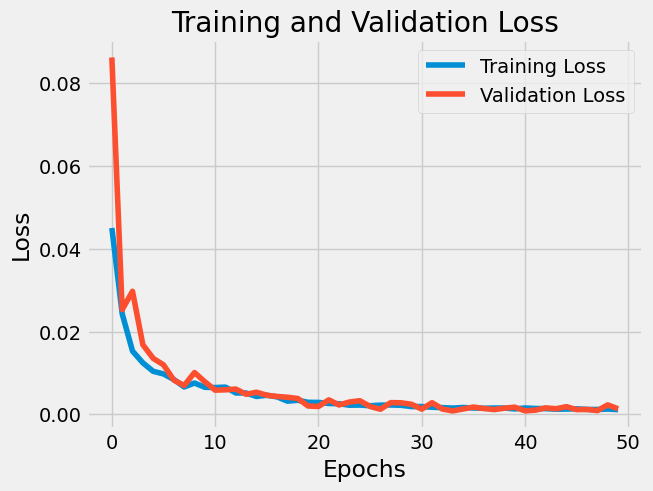

In [47]:
# Plot training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


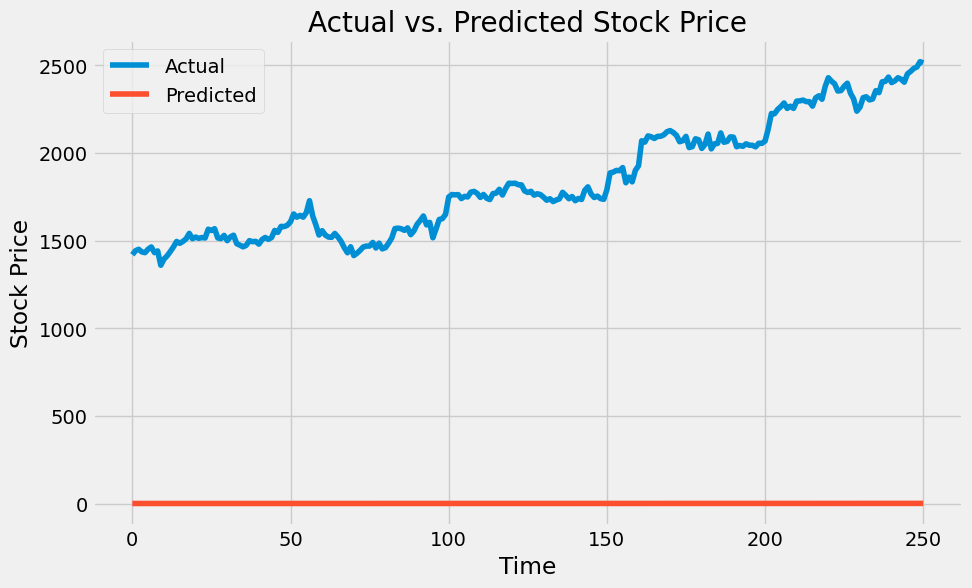

In [48]:
# Plot actual vs. predicted values for the test data
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Actual vs. Predicted Stock Price')
plt.legend()
plt.show()